In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


# **Observation from df.info()**


*   The dataset contains 891 rows and 15 columns.

*   Columns like age and deck contain missing values.
*   The dataset includes both numerical variables (int, float) and categorical variables (object, category).

*   Some preprocessing may be required to handle missing values.



















In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **Observation from df.describe()**

• The average age of passengers is approximately **29 years.**

• The average fare paid by passengers is around **32.**

• The minimum age is very low, indicating the presence of infants.

• The maximum fare is quite high, suggesting some passengers traveled in higher classes.

• There is variation in age and fare, as indicated by the standard deviation values.


In [ ]:
df['survived'].value_counts()

,count
survived,
0,549
1,342


In [ ]:
df['sex'].value_counts()

,count
sex,
male,577
female,314


# **Observation from value_counts()**

• The number of passengers who **did not survive** is higher than those who survived.

• There are more **male passengers** than female passengers in the dataset.

• This suggests that survival rate analysis based on gender may reveal important patterns.

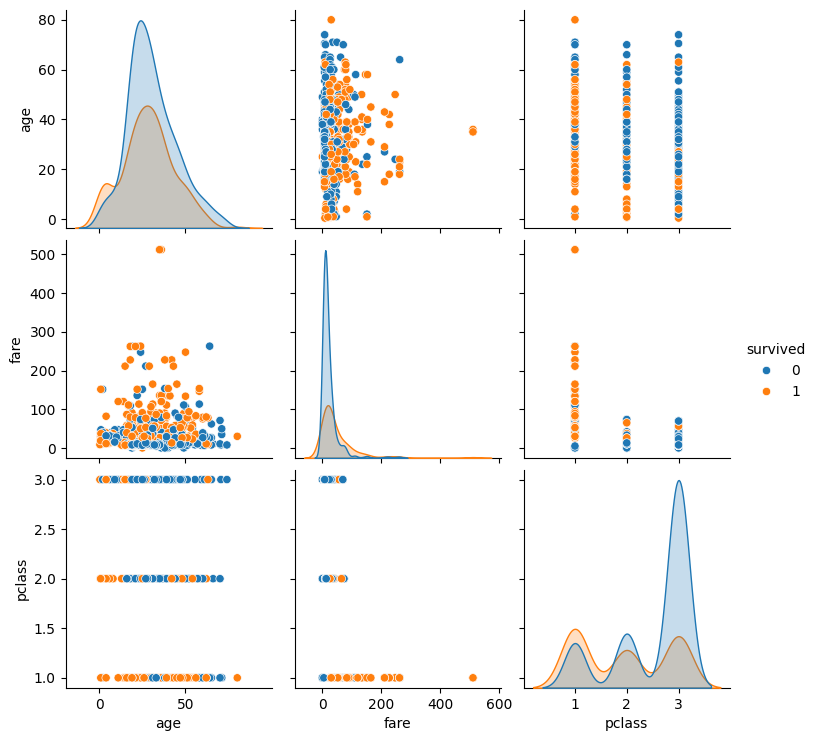

In [ ]:
sns.pairplot(df[['age','fare','pclass','survived']], hue='survived')
plt.show()

# **Observation from Pairplot**

• Passengers who paid higher fares appear more likely to survive.

• First class passengers (pclass = 1) show higher survival rates.

• There is no strong direct linear relationship between age and survival.

• Fare and passenger class show some correlation.

• Survival appears influenced more by class and fare than age.

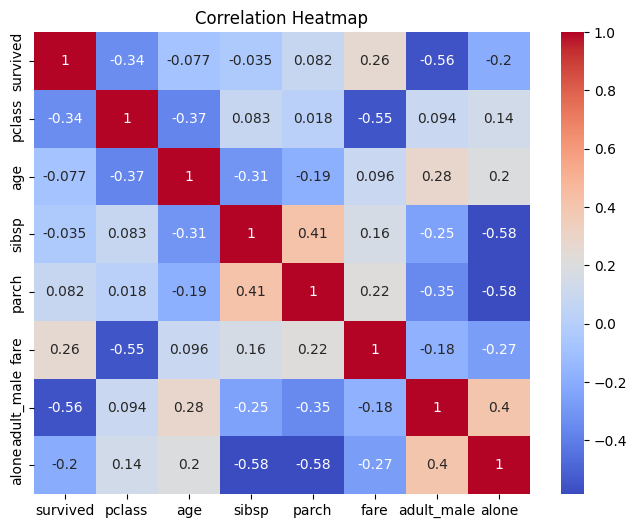

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# **Observation from Correlation Heatmap**

• There is a **positive correlation between fare and survival**,meaning passengers who paid higher fares were more likely to survive.

• Passenger class (pclass) has a **negative correlation with survival**, indicating first-class passengers had higher survival rates.

• Age shows a very **weak** correlation with survival.

• Fare and passenger class are **strongly negatively correlated**, meaning higher class passengers paid higher fares.

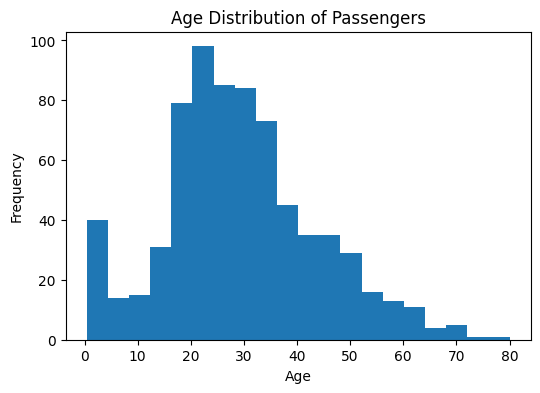

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(df['age'].dropna(), bins=20)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# **Observation from Histogram (Age Distribution)**

• Most passengers were between **20–40 years old**.

• The distribution appears slightly right-skewed.

• There were very young passengers (**infants**) as well.

• **Fewer** elderly passengers were present on board.

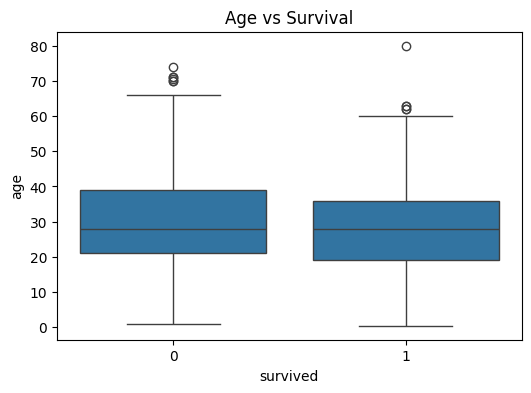

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='survived', y='age', data=df)
plt.title("Age vs Survival")
plt.show()

# **Observation from Boxplot (Age vs Survival)**

• The median age of survivors and non-survivors is slightly different.

• Younger passengers appear to have a slightly higher survival rate.

• There is overlap between age groups, indicating age alone was not the only factor affecting survival.

• Some outliers are visible, representing unusually young or old passengers.

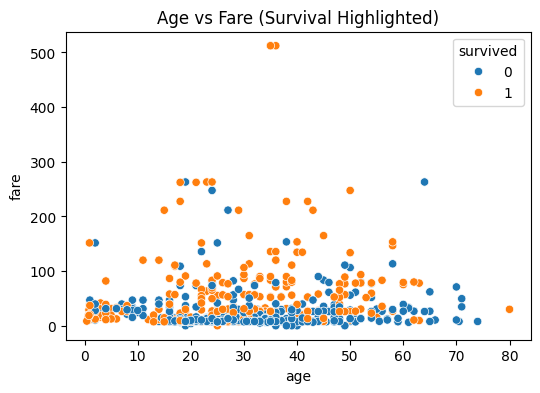

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='age', y='fare', hue='survived', data=df)
plt.title("Age vs Fare (Survival Highlighted)")
plt.show()

# **Observation from Scatterplot (Age vs Fare)**

• Passengers who paid higher fares had a **higher survival rate**.

• Many survivors are** clustered **in higher fare ranges.

• Lower fare passengers show a higher number of non-survivors.

• Age does not show a strong direct relationship with fare.

• Fare appears to have a **stronger impact on survival** than age.

# **Final Summary of Findings**

1. After performing Exploratory Data Analysis (EDA) on the Titanic dataset, several important patterns and relationships were identified.

2. The dataset consists of 891 passenger records with both numerical and categorical variables. Missing values were observed mainly in the "age" and "deck" columns.

3. The majority of passengers were between 20 and 40 years old. Analysis of passenger class revealed that first-class passengers had a significantly higher survival rate compared to second and third class passengers.

4. Fare showed a positive relationship with survival. Passengers who paid higher fares were more likely to survive. This suggests that socio-economic status played an important role in survival outcomes.

5. Age showed a slight influence on survival, with younger passengers having somewhat better survival chances. However, age was not the strongest factor affecting survival.

6. Correlation analysis using a heatmap indicated that fare and passenger class had stronger relationships with survival compared to age.

7. Overall, the analysis concludes that passenger class and fare were the most influential factors affecting survival on the Titanic, while age had a moderate impact.

# End of Report
All analyses and visualizations are complete.
